In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
analysis_dir = "/home/thomas/ai_projects/MAS_MT_RL/mappo/data"

In [6]:
dfA2T2 = pd.read_csv(f"{analysis_dir}/A2T2_A0T1.csv")
dfA2T2.drop(['Wall time'], axis=1, inplace=True)
dfA2T2.rename(columns={"Value": "A2T2"}, inplace=True)

dfA2T4 = pd.read_csv(f"{analysis_dir}/A2T4_A0T1.csv")
dfA2T4.drop(["Wall time"], axis=1, inplace=True)
dfA2T4.rename(columns={"Value": "A2T4"}, inplace=True)

dfA2T10 = pd.read_csv(f"{analysis_dir}/T10A2_A0_T1.csv")
dfA2T10.drop(["Wall time"], axis=1, inplace=True)
dfA2T10.rename(columns={"Value": "A2T10"}, inplace=True)

dfA5T10 = pd.read_csv(f"{analysis_dir}/A5T10_A0T1.csv")
dfA5T10.drop(["Wall time"], axis=1, inplace=True)
dfA5T10.rename(columns={"Value": "A5T10"}, inplace=True)

# Merge the dfs on Step
df = pd.merge(dfA2T2, dfA2T4, how="right", on=["Step"])
print("Merge state 1\n", df.head())
df = pd.merge(df, dfA2T10, how="right", on=["Step"])
print("Merge stage 2\n", df.head())
df = pd.merge(df, dfA5T10, how="right", on=["Step"])
print("Merge stage 2\n", df.head())
df.set_index("Step", inplace=True)
print(df.head())

Merge state 1
     Step   A2T2   A2T4
0   2560  0.499  0.499
1   5120  0.499  0.500
2   7680  0.500  0.500
3  10240  0.500  0.501
4  12800  0.500  0.501
Merge stage 2
     Step   A2T2   A2T4  A2T10
0   2560  0.499  0.499   0.06
1   5120  0.499  0.500   0.06
2   7680  0.500  0.500   0.06
3  10240  0.500  0.501   0.06
4  12800  0.500  0.501   0.06
Merge stage 2
     Step   A2T2   A2T4  A2T10  A5T10
0   2560  0.499  0.499   0.06   0.06
1   5120  0.499  0.500   0.06   0.06
2   7680  0.500  0.500   0.06   0.06
3  10240  0.500  0.501   0.06   0.07
4  12800  0.500  0.501   0.06   0.07
        A2T2   A2T4  A2T10  A5T10
Step                             
2560   0.499  0.499   0.06   0.06
5120   0.499  0.500   0.06   0.06
7680   0.500  0.500   0.06   0.06
10240  0.500  0.501   0.06   0.07
12800  0.500  0.501   0.06   0.07


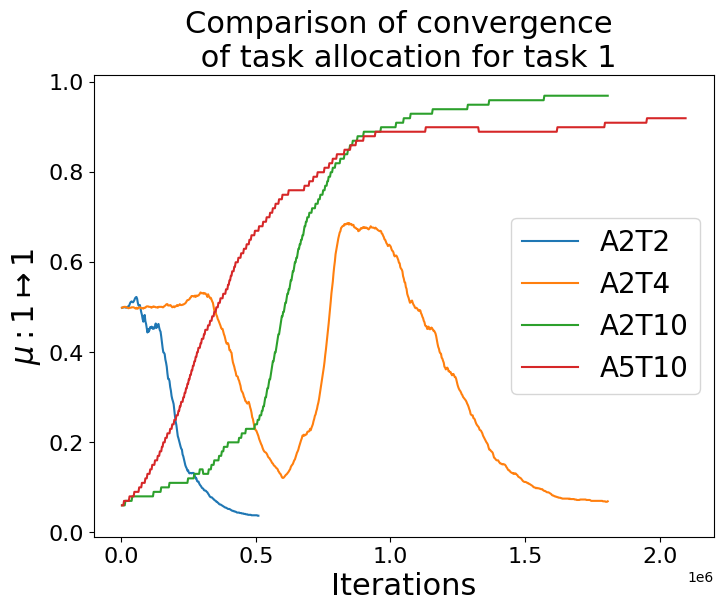

In [7]:
df.plot(figsize=(8,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("$\mu: 1\mapsto 1$", fontsize=22)
plt.title("Comparison of convergence \n of task allocation for task 1",
         fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.savefig("convT1.png")
plt.show()

## Convergence of Task 1 Success Rate

In [8]:
dfA2T2T1Succ = pd.read_csv(f"{analysis_dir}/A2T2_T1SuccRate.csv")
dfA2T2T1Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T2T1Succ.rename(columns={"Value":"A2T2"}, inplace=True)

dfA2T4T1Succ = pd.read_csv(f"{analysis_dir}/A2T4_T1SuccRate.csv")
dfA2T4T1Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T4T1Succ.rename(columns={"Value":"A2T4"}, inplace=True)

dfA2T10T1Succ = pd.read_csv(f"{analysis_dir}/T10A2_T1SuccRate.csv")
dfA2T10T1Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T10T1Succ.rename(columns={"Value":"A2T10"}, inplace=True)

dfA5T10T1Succ = pd.read_csv(f"{analysis_dir}/T10A5_T1SuccRate.csv")
dfA5T10T1Succ.drop(["Wall time"], axis=1, inplace=True)
dfA5T10T1Succ.rename(columns={"Value":"A5T10"}, inplace=True)

dfSuccT1 = pd.merge(dfA2T2T1Succ, dfA2T4T1Succ, how="right", on=["Step"])
dfSuccT1 = pd.merge(dfSuccT1, dfA2T10T1Succ, how="right", on=["Step"])
dfSuccT1 = pd.merge(dfSuccT1, dfA5T10T1Succ, how="right", on=["Step"])
dfSuccT1.set_index("Step", inplace=True)
print(dfSuccT1.head())

        A2T2  A2T4  A2T10  A5T10
Step                            
2560   0.000   0.0    0.0   0.00
5120   0.000   0.0    0.0   0.00
7680   0.500   0.0    0.0   0.00
10240  0.727   0.0    0.0   0.25
12800  0.615   0.3    0.0   0.25


In [13]:
smoothT1 = dfSuccT1.ewm(alpha=0.05).mean()
smoothT1.rename(columns={"A2T2": "Avg A2T2", 
                         "A2T4": "Avg A2T4", 
                         "A2T10": "Avg A2T10",
                         "A5T10": "Avg A5T10"}, inplace=True)
total = pd.merge(dfSuccT1, smoothT1, how="left", on=["Step"])
total.head()

,A2T2,A2T4,A2T10,A5T10,Avg A2T2,Avg A2T4,Avg A2T10,Avg A5T10
Step,,,,,,,,
2560,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000
5120,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000
7680,0.500,0.0,0.0,0.00,0.175285,0.000000,0.0,0.000000
10240,0.727,0.0,0.0,0.25,0.324000,0.000000,0.0,0.067388
12800,0.615,0.3,0.0,0.25,0.388318,0.066307,0.0,0.107750


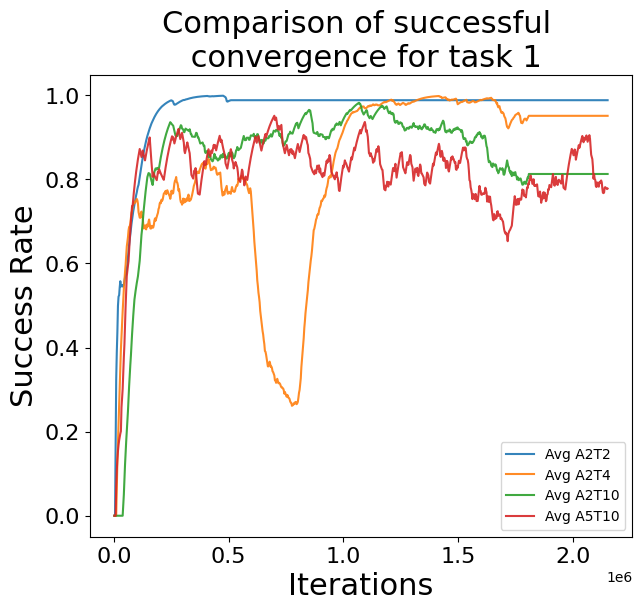

In [14]:
#ax = total[["A2T2", "A2T4", "A2T10"]].plot(alpha=0.8)
total[["Avg A2T2", "Avg A2T4", "Avg A2T10", "Avg A5T10"]].plot(alpha=0.9, figsize=(7,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("Success Rate", fontsize=22)
plt.title("Comparison of successful \n convergence for task 1", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("succT1.png")
plt.show()

## Convergence Task 2 Success Rate

In [17]:
dfA2T2T2Succ = pd.read_csv(f"{analysis_dir}/A2T2_T2SuccRate.csv")
dfA2T2T2Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T2T2Succ.rename(columns={"Value":"A2T2"}, inplace=True)

dfA2T4T2Succ = pd.read_csv(f"{analysis_dir}/A2T4_T2SuccRate.csv")
dfA2T4T2Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T4T2Succ.rename(columns={"Value":"A2T4"}, inplace=True)

dfA2T10T2Succ = pd.read_csv(f"{analysis_dir}/T10A2_T2SuccRate.csv")
dfA2T10T2Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T10T2Succ.rename(columns={"Value":"A2T10"}, inplace=True)

dfA5T10T2Succ = pd.read_csv(f"{analysis_dir}/T10A5_T2SuccRate.csv")
dfA5T10T2Succ.drop(["Wall time"], axis=1, inplace=True)
dfA5T10T2Succ.rename(columns={"Value":"A5T10"}, inplace=True)

dfSuccT2 = pd.merge(dfA2T2T2Succ, dfA2T4T2Succ, how="right", on=["Step"])
dfSuccT2 = pd.merge(dfSuccT2, dfA2T10T2Succ, how="right", on=["Step"])
dfSuccT2 = pd.merge(dfSuccT2, dfA5T10T2Succ, how="right", on=["Step"])
dfSuccT2.set_index("Step", inplace=True)
print(dfSuccT2.head())

smoothT2 = dfSuccT2.ewm(alpha=0.05).mean()
smoothT2.rename(columns={"A2T2": "Avg A2T2", 
                         "A2T4": "Avg A2T4", 
                         "A2T10": "Avg A2T10",
                         "A5T10": "Avg A5T10"}, inplace=True)
totalT2 = pd.merge(dfSuccT2, smoothT2, how="left", on=["Step"])
totalT2.head()

        A2T2  A2T4  A2T10  A5T10
Step                            
2560   0.200   0.0    0.0   0.00
5120   0.500   0.0    0.0   0.00
7680   0.899   0.0    0.0   0.00
10240  0.818   0.0    0.0   0.25
12800  0.692   0.1    0.0   0.25


,A2T2,A2T4,A2T10,A5T10,Avg A2T2,Avg A2T4,Avg A2T10,Avg A5T10
Step,,,,,,,,
2560,0.200,0.0,0.0,0.00,0.200000,0.000000,0.0,0.000000
5120,0.500,0.0,0.0,0.00,0.353846,0.000000,0.0,0.000000
7680,0.899,0.0,0.0,0.00,0.544961,0.000000,0.0,0.000000
10240,0.818,0.0,0.0,0.25,0.618559,0.000000,0.0,0.067388
12800,0.692,0.1,0.0,0.25,0.634791,0.022102,0.0,0.107750


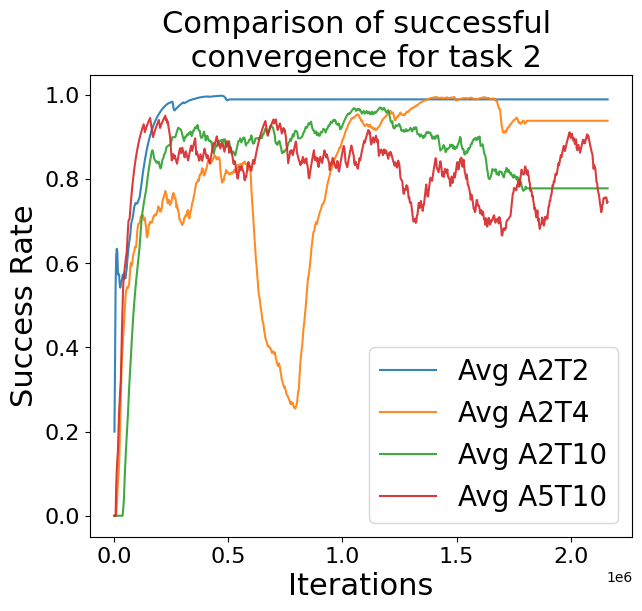

In [18]:
totalT2[["Avg A2T2", "Avg A2T4", "Avg A2T10", "Avg A5T10"]].plot(alpha=0.9, figsize=(7,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("Success Rate", fontsize=22)
plt.title("Comparison of successful \n convergence for task 2",
         fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.savefig("succT2.png")
plt.show()

## Convergence of Task 3 Success Rate

In [26]:
dfA2T4T3Succ = pd.read_csv(f"{analysis_dir}/A2T4_T3SuccRate.csv")
dfA2T4T3Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T4T3Succ.rename(columns={"Value":"A2T4"}, inplace=True)

dfA2T10T3Succ = pd.read_csv(f"{analysis_dir}/T10A2_T3SuccRate.csv")
dfA2T10T3Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T10T3Succ.rename(columns={"Value":"A2T10"}, inplace=True)

dfA5T10T3Succ = pd.read_csv(f"{analysis_dir}/T10A5_T3SuccRate.csv")
dfA5T10T3Succ.drop(["Wall time"], axis=1, inplace=True)
dfA5T10T3Succ.rename(columns={"Value":"A5T10"}, inplace=True)

dfSuccT3 = pd.merge(dfA2T4T3Succ, dfA2T10T3Succ, how="right", on=["Step"])
dfSuccT3 = pd.merge(dfSuccT3, dfA5T10T3Succ, how="right", on=["Step"])
dfSuccT3.set_index("Step", inplace=True)

print(dfSuccT3.head())

smoothT3 = dfSuccT3.ewm(alpha=0.05).mean()
smoothT3.rename(columns={"A2T2": "Avg A2T2", 
                         "A2T4": "Avg A2T4", 
                         "A2T10": "Avg A2T10",
                         "A5T10": "Avg A5T10"}, inplace=True)
totalT3 = pd.merge(dfSuccT3, smoothT3, how="left", on=["Step"])
totalT3.head()

       A2T4  A2T10  A5T10
Step                     
2560    0.0    0.0   0.00
5120    0.0    0.0   0.00
7680    0.0    0.0   0.00
10240   0.0    0.0   0.25
12800   0.1    0.0   0.50


,A2T4,A2T10,A5T10,Avg A2T4,Avg A2T10,Avg A5T10
Step,,,,,,
2560,0.0,0.0,0.00,0.000000,0.0,0.000000
5120,0.0,0.0,0.00,0.000000,0.0,0.000000
7680,0.0,0.0,0.00,0.000000,0.0,0.000000
10240,0.0,0.0,0.25,0.000000,0.0,0.067388
12800,0.1,0.0,0.50,0.022102,0.0,0.163006


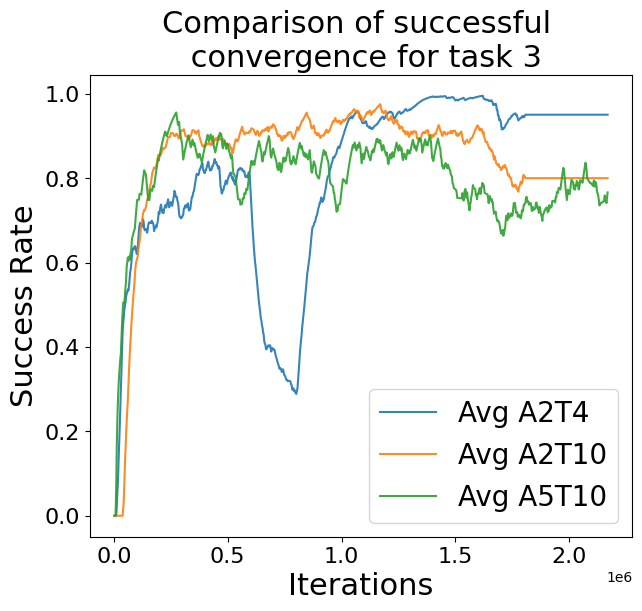

In [27]:
totalT3[["Avg A2T4", "Avg A2T10", "Avg A5T10"]].plot(alpha=0.9, figsize=(7,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("Success Rate", fontsize=22)
plt.title("Comparison of successful \n convergence for task 3",
         fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.savefig("succT3.png")
plt.show()

## Convergence of Task 4 Success Rate

In [31]:
dfA2T4T4Succ = pd.read_csv(f"{analysis_dir}/A2T4_T4SuccRate.csv")
dfA2T4T4Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T4T4Succ.rename(columns={"Value":"A2T4"}, inplace=True)

dfA2T10T4Succ = pd.read_csv(f"{analysis_dir}/T10A2_T4SuccRate.csv")
dfA2T10T4Succ.drop(["Wall time"], axis=1, inplace=True)
dfA2T10T4Succ.rename(columns={"Value":"A2T10"}, inplace=True)

dfA5T10T4Succ = pd.read_csv(f"{analysis_dir}/T10A5_T4SuccRate.csv")
dfA5T10T4Succ.drop(["Wall time"], axis=1, inplace=True)
dfA5T10T4Succ.rename(columns={"Value":"A5T10"}, inplace=True)

dfSuccT4 = pd.merge(dfA2T4T4Succ, dfA2T10T4Succ, how="right", on=["Step"])
dfSuccT4 = pd.merge(dfSuccT4, dfA5T10T4Succ, how="right", on=["Step"])
dfSuccT4.set_index("Step", inplace=True)
print(dfSuccT4.head())

smoothT4 = dfSuccT4.ewm(alpha=0.05).mean()
smoothT4.rename(columns={"A2T2": "Avg A2T2", 
                         "A2T4": "Avg A2T4", 
                         "A2T10": "Avg A2T10",
                         "A5T10": "Avg A5T10"}, inplace=True)
totalT4 = pd.merge(dfSuccT4, smoothT4, how="left", on=["Step"])
totalT4.head()

       A2T4  A2T10  A5T10
Step                     
2560    0.0    0.0   0.00
5120    0.0    0.0   0.00
7680    0.0    0.0   0.00
10240   0.0    0.0   0.25
12800   0.0    0.0   0.50


,A2T4,A2T10,A5T10,Avg A2T4,Avg A2T10,Avg A5T10
Step,,,,,,
2560,0.0,0.0,0.00,0.0,0.0,0.000000
5120,0.0,0.0,0.00,0.0,0.0,0.000000
7680,0.0,0.0,0.00,0.0,0.0,0.000000
10240,0.0,0.0,0.25,0.0,0.0,0.067388
12800,0.0,0.0,0.50,0.0,0.0,0.163006


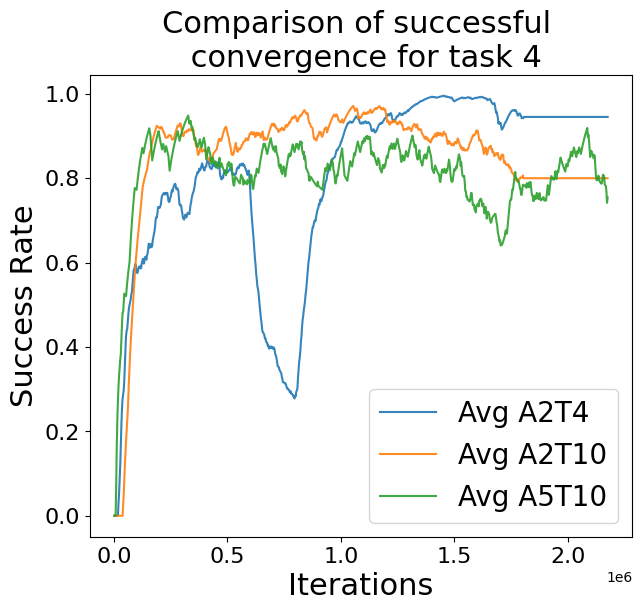

In [32]:
totalT4[["Avg A2T4", "Avg A2T10", "Avg A5T10"]].plot(alpha=0.9, figsize=(7,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("Success Rate", fontsize=22)
plt.title("Comparison of successful \n convergence for task 4",
         fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.savefig("succT4.png")
plt.show()

In [38]:
dfA2T2P = pd.read_csv(f"{analysis_dir}/A2T2_policyloss.csv")
dfA2T2P.drop(["Wall time"], axis=1, inplace=True)
dfA2T2P.rename(columns={"Value":"A2T2"}, inplace=True)

dfA2T4P = pd.read_csv(f"{analysis_dir}/A2T4_policyloss.csv")
dfA2T4P.drop(["Wall time"], axis=1, inplace=True)
dfA2T4P.rename(columns={"Value":"A2T4"}, inplace=True)

dfA2T10P = pd.read_csv(f"{analysis_dir}/T10A2_policyloss.csv")
dfA2T10P.drop(["Wall time"], axis=1, inplace=True)
dfA2T10P.rename(columns={"Value":"A2T10"}, inplace=True)

dfA5T10P = pd.read_csv(f"{analysis_dir}/T10A5_policyloss.csv")
dfA5T10P.drop(["Wall time"], axis=1, inplace=True)
dfA5T10P.rename(columns={"Value":"A5T10"}, inplace=True)

dfP = pd.merge(dfA2T2P, dfA2T4P, how="right", on=["Step"])
dfP = pd.merge(dfP, dfA2T10P, how="right", on=["Step"])
dfP = pd.merge(dfP, dfA5T10P, how="right", on=["Step"])
dfP.set_index("Step", inplace=True)
print(dfP.head())

smoothP = dfP.ewm(alpha=0.05).mean()
smoothP.rename(columns={"A2T2": "Avg A2T2", 
                        "A2T4": "Avg A2T4", 
                        "A2T10": "Avg A2T10",
                        "A5T10": "Avg A5T10"}, inplace=True)
totalP = pd.merge(dfP, smoothP, how="left", on=["Step"])
totalP.head()

           A2T2      A2T4     A2T10     A5T10
Step                                         
2560  -0.295608 -0.267880 -0.614225 -0.406314
5120  -0.238422 -0.268108 -0.560957 -0.275677
7680  -0.309453 -0.223144 -0.278424 -0.201987
10240 -0.410217 -0.139917 -0.317016 -0.340758
12800 -0.352721 -0.183132 -0.263500 -0.231689


,A2T2,A2T4,A2T10,A5T10,Avg A2T2,Avg A2T4,Avg A2T10,Avg A5T10
Step,,,,,,,,
2560,-0.295608,-0.267880,-0.614225,-0.406314,-0.295608,-0.267880,-0.614225,-0.406314
5120,-0.238422,-0.268108,-0.560957,-0.275677,-0.266282,-0.267997,-0.586908,-0.339321
7680,-0.309453,-0.223144,-0.278424,-0.201987,-0.281416,-0.252273,-0.478763,-0.291176
10240,-0.410217,-0.139917,-0.317016,-0.340758,-0.316135,-0.221987,-0.435164,-0.304540
12800,-0.352721,-0.183132,-0.263500,-0.231689,-0.324221,-0.213399,-0.397222,-0.288438


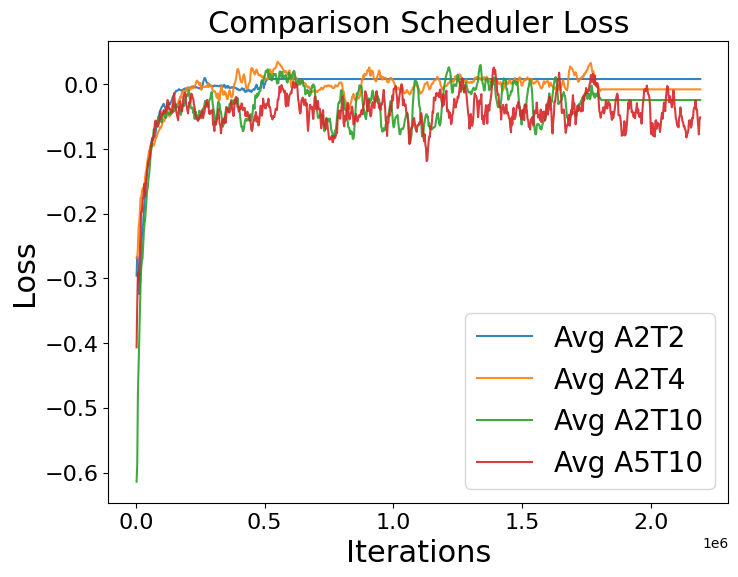

In [40]:
totalP[["Avg A2T2", "Avg A2T4", "Avg A2T10", "Avg A5T10"]].plot(alpha=0.9, figsize=(8,6))
plt.xlabel("Iterations", fontsize=22)
plt.ylabel("Loss", fontsize=22)
plt.title("Comparison Scheduler Loss", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.savefig("policy_loss.png")
plt.show()